
# Hierarchical Clustering


## Objectives

After completing this notebook you will be able to:

*   Use scikit-learn to Hierarchical clustering
*   Create dendograms to visualize the clustering


<h1 id="hierarchical_agglomerative">Hierarchical Clustering - Agglomerative</h1>

We will be looking at a clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Remember that agglomerative is the bottom up approach. <br> <br>
In this notebook, we will be looking at Agglomerative clustering, which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br> <b> <i> NOTE: You can also try using Average Linkage wherever Complete Linkage would be used to see the difference! </i> </b>


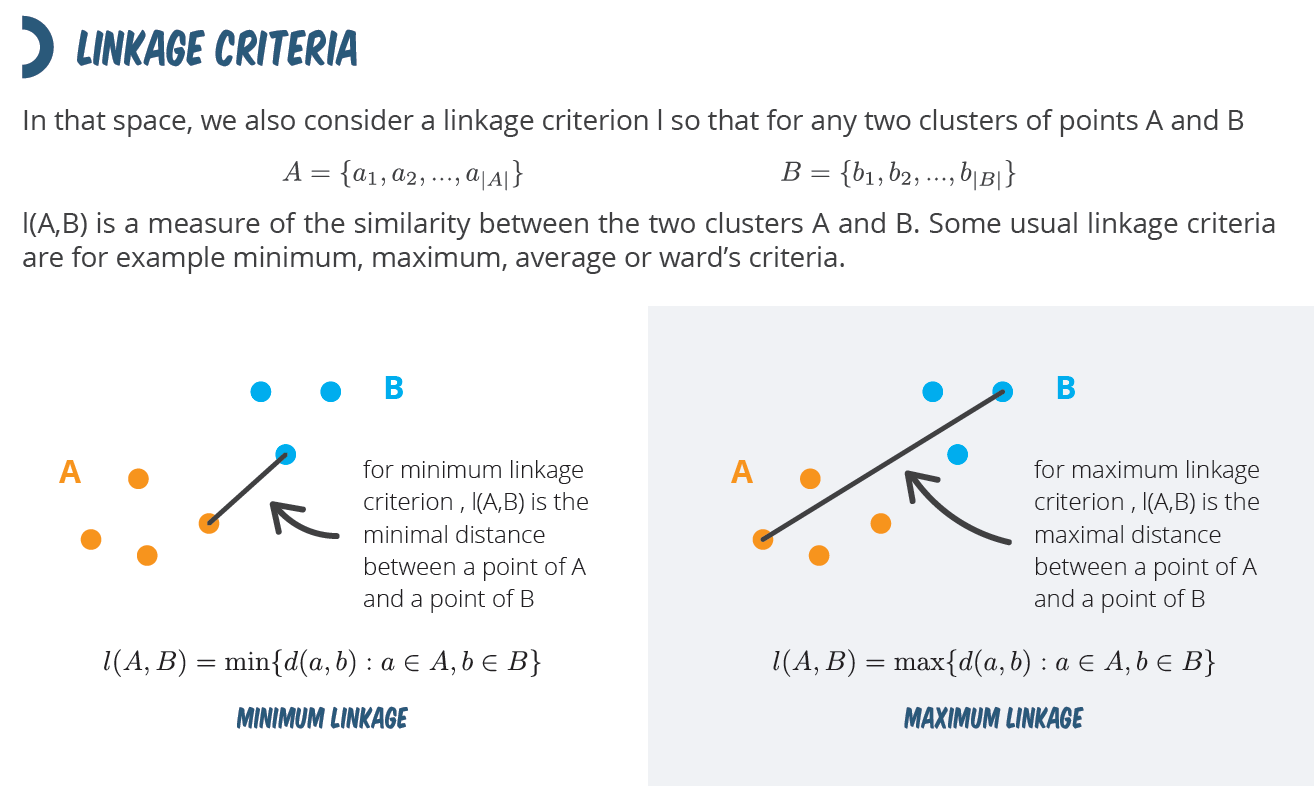
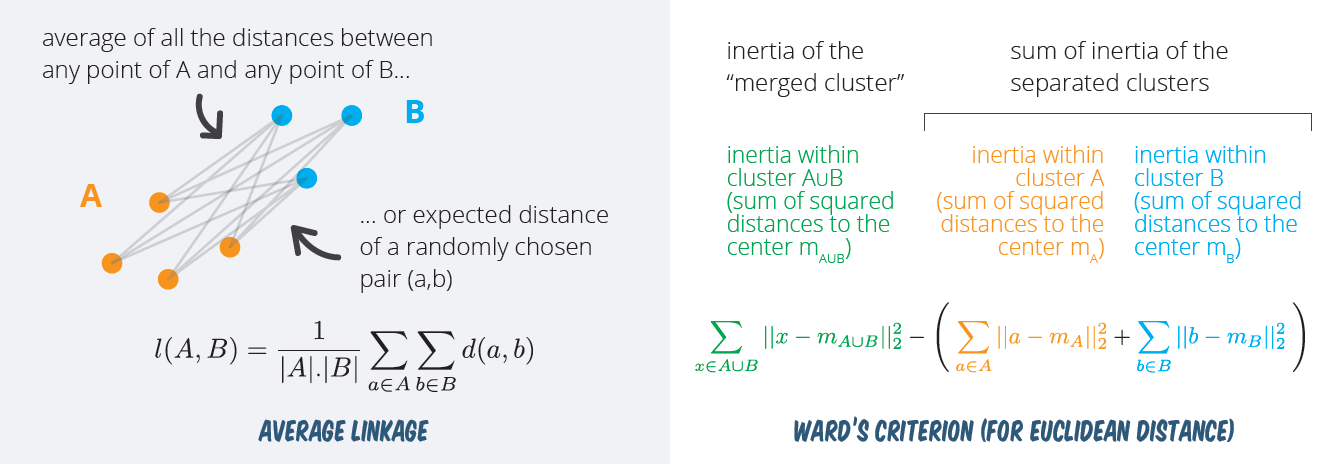

In [ ]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
from matplotlib.pyplot import figure
plt.rc("figure", figsize = (20,10))
%matplotlib inline

<hr>
<h3 id="generating_data">Generating Random Data</h3>
We will be generating a set of data using the <b>make_blobs</b> class. <br> <br>
Input these parameters into make_blobs:
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Choose a number from 10-1500 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. The larger the number, the further apart the clusters</li>
    <ul> <li> Choose a number between 0.5-1.5 </li> </ul>
</ul> <br>
Save the result to <b>X1</b> and <b>y1</b>.


In [ ]:
X1, y1 = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.8)

Plot the scatter plot of the randomly generated data.


In [ ]:
#plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

<hr>
<h3 id="agglomerative_clustering">Agglomerative Clustering</h3>

We will start by clustering the random data points we just created.


The <b> Agglomerative Clustering </b> class will require two inputs:

<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 </li> </ul>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 


In [ ]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'average')

Fit the model with <b> X2 </b> and <b> y2 </b> from the generated data above.


In [ ]:
agglom.fit(X1,y1)

Run the following code to show the clustering! <br>
Remember to read the code and comments to gain more understanding on how the plotting works.


In [ ]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot

plt.show()

<h3 id="dendrogram">Dendrogram Associated for the Agglomerative Hierarchical Clustering</h3>

Remember that a <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>.

Use the function <b> distance_matrix, </b> which requires <b>two inputs</b>. Use the Feature Matrix, <b> X1 </b> as both inputs and save the distance matrix to a variable called <b> dist_matrix </b> <br> <br>
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. <br> (print out dist_matrix to make sure it's correct)


In [ ]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

Using the <b> linkage </b> class from hierarchy, pass in the parameters:

<ul>
    <li> The distance matrix </li>
    <li> 'complete' for complete linkage </li>
</ul> <br>
Save the result to a variable called <b> Z </b>.


In [ ]:
Z = hierarchy.linkage(dist_matrix, 'complete')

A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters.
By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

Next, we will save the dendrogram to a variable called <b>dendro</b>. In doing this, the dendrogram will also be displayed.
Using the <b> dendrogram </b> class from hierarchy, pass in the parameter:

<ul> <li> Z </li> </ul>


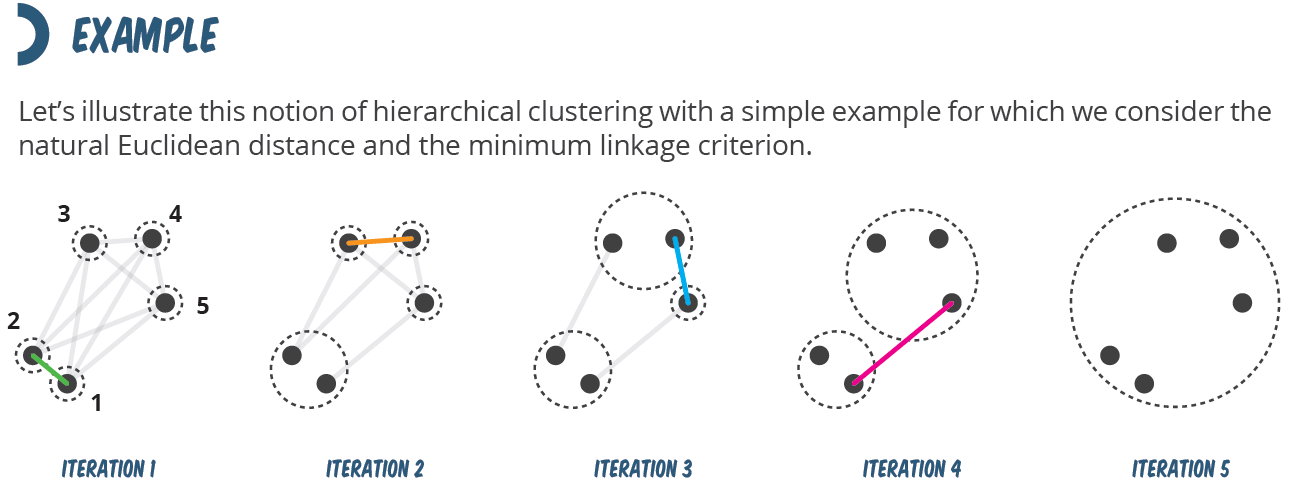
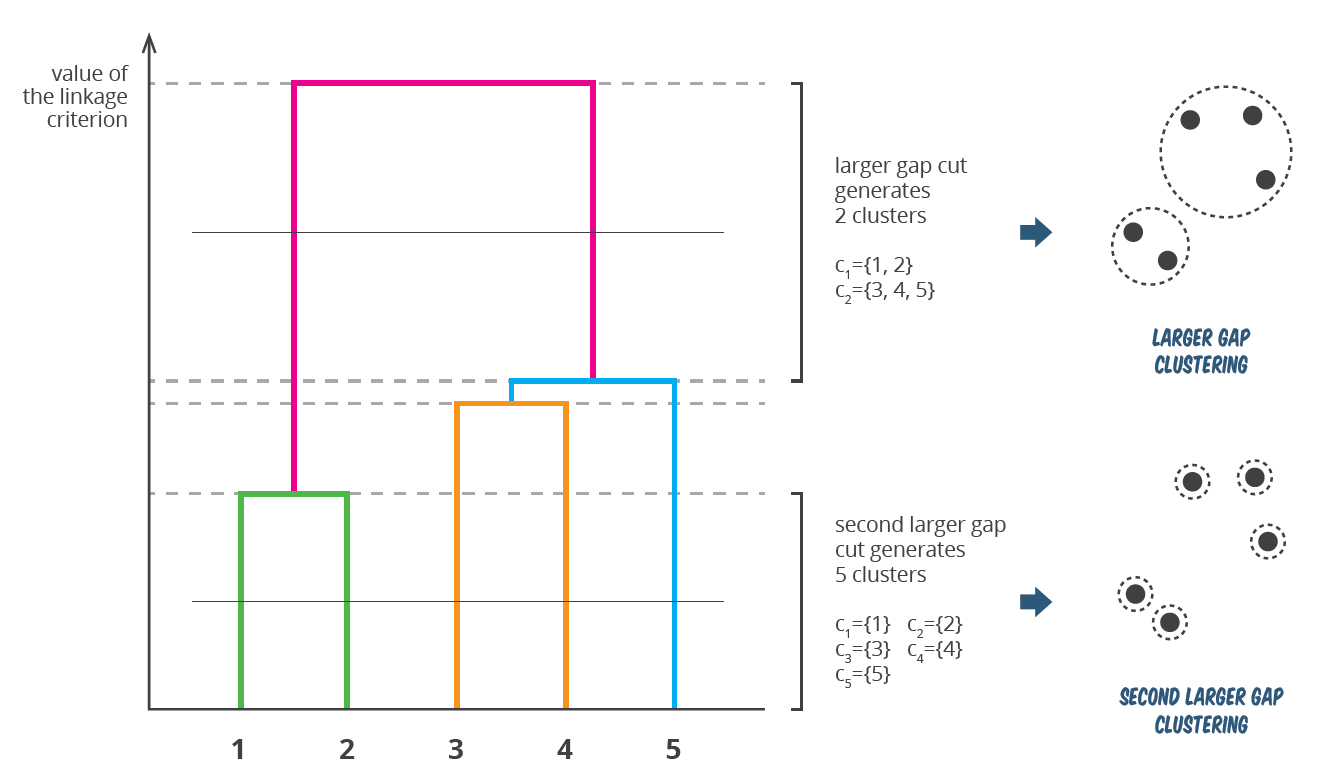

In [ ]:
plt.rc("figure", figsize = (20,10))
dendro = hierarchy.dendrogram(Z)
plt.title('Dendogram')
plt.show()

## Practice

We used **complete** linkage for our case, change it to **average** linkage to see how the dendogram changes.


In [ ]:
# write your code here
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)


<details><summary>Click here for the solution</summary>

```python
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

```

</details>


<hr>
<h1 id="clustering_vehicle_dataset">Clustering on Vehicle dataset</h1>

Imagine that an automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes--that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

Our objective here, is to use clustering methods, to find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacturers to make decision about the supply of new models.


## Read data

Let's read dataset to see what features the manufacturer has collected about the existing models.


In [ ]:
filename = 'Lecture_7_cars_clusters.csv'

#Read csv
df = pd.read_csv(filename)
print ("Shape of dataset: ", df.shape)

df.head()

In [ ]:
df.info()

<h2 id="data_cleaning">Data Cleaning</h2>


The feature sets include  price in thousands (price), engine size (engine_s), horsepower (horsepow), wheelbase (wheelbas), width (width), length (length), curb weight (curb_wgt), fuel capacity (fuel_cap) and fuel efficiency (mpg).


In [ ]:
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)
print ("Shape of dataset: ", df.shape)
df.head()

In [ ]:
df.info()

### Feature selection

Let's select our feature set:


In [ ]:
df.columns

In [ ]:
featureset = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [ ]:
featureset.head()

### Normalization

Now we can normalize the feature set. **MinMaxScaler** transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

<h2 id="clustering_using_skl">Clustering using scikit-learn</h2>


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
import pylab
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

In [ ]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

In [ ]:
Z_using_dist_matrix

In [ ]:
plt.rc("figure", figsize = (16,6))
dendro = hierarchy.dendrogram(Z_using_dist_matrix)
plt.title('Dendogram')
plt.show()

In [ ]:
df.head()

In [ ]:
df.loc[df['model'] == 'F-Series']

In [ ]:
df.loc[df['model'] == 'Ram Pickup']

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

*   Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
*   Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
*   Average linkage minimizes the average of the distances between all observations of pairs of clusters.


In [ ]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

We can add a new field to our dataframe to show the cluster of each row:


In [ ]:
df['cluster_'] = agglom.labels_
df.head()

In [ ]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 16 inches by 14 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

As you can see, we are seeing the distribution of each cluster using the scatter plot, but it is not very clear where is the centroid of each cluster. Moreover, there are 2 types of vehicles in our dataset, "truck" (value of 1 in the type column) and "car" (value of 0 in the type column). So, we use them to distinguish the classes, and summarize the cluster. First we count the number of cases in each group:


In [ ]:
df.groupby(['cluster_','type'])['cluster_'].count()

Now we can look at the characteristics of each cluster:


In [ ]:
agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

It is obvious that we have 3 main clusters with the majority of vehicles in those.

**Cars**:

*   Cluster 1: with almost high mpg, and low in horsepower.

*   Cluster 2: with good mpg and horsepower, but higher price than average.

*   Cluster 3: with low mpg, high horsepower, highest price.

**Trucks**:

*   Cluster 1: with almost highest mpg among trucks, and lowest in horsepower and price.
*   Cluster 2: with almost low mpg and medium horsepower, but higher price than average.
*   Cluster 3: with good mpg and horsepower, low price.

Please notice that we did not use **type**  and **price** of cars in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite a high accuracy.


In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
